# Day 15

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

# 최적화 기초

### 중요 개념

* 최적화 문제
* 목적 함수, 비용 함수, 손실 함수
* 그리드 서치, 수치적 최적화
* 기울기 필요 조건
* SGD(Steepest Gradient Descent) 방법

예측 문제의 최종 목표는 실제 출력값 즉 타켓(target)값과 가장 유사한 값을 출력하는 즉, 예측 오차를 최소화하는 모형을 찾는 것이다. 이 때 우리가 설정할 수 있는 숫자는 예측 모형의 모수(parameter)이다.

따라서 **모수를 입력으로 하고 예측 오차를 출력으로 하는 함수** 관계가 성립한다.

$$\text{모수} \;\; \xrightarrow{f} \;\; \text{예측 오차} $$

이 함수를 최소화하는 모수를 찾는 문제를 **최적화(optimization) 문제**라고 한다.

## 최적화 문제

최적화 문제는 특정한 제한 조건(constraint)을 만족시키면서 함수 $f$의 값을 최소화하는 변수 $x$의 값 $x^{\ast}$를 찾는 것이다. 최대화 문제는 $f(x)$ 를 $-f(x)$ 로 바꾸면 풀 수 있으므로 보통 최소화의 경우만 고려한다..

$$ x^{\ast} = \underset{x}{\operatorname{arg\,min}} \; f(x) $$

이 때 최소화 혹은 최대화 하려는 함수를 **목적 함수(objective function)** 또는 **비용 함수(cost function)**, **손실 함수(loss function)**라고 한다.

다음은 1차원 목적 함수의 예이다. 그래프에서 이 목적 함수 $f_1(x)$의 최저점은 $x^{\ast}=2$임을 알 수 있다.

In [165]:
def f1(x):
    return (x - 2) ** 2 + 2

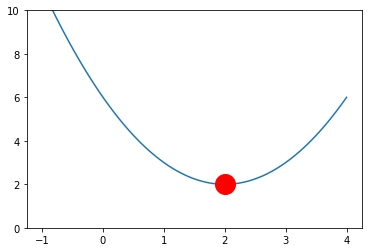

In [166]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=20)
plt.ylim(0, 10)
plt.show()

다음은 2차원 목적 함수의 예로 2차원 Rosenbrock 함수 $f_2(x, y)$를 보였다.

$$ f(x, y) = (1 − x )^2 + 100(y − x^2)^2 $$
 

In [167]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

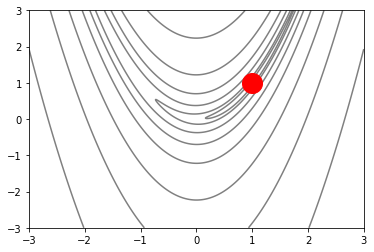

In [168]:
xx = np.linspace(-3, 3, 1000)
yy = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)
plt.show()

## 그리드 서치와 수치적 최적화

목적 함수의 값을 가장 작게 하는 $x$ 위치를 찾는 최적화 문제를 푸는 가장 간단한 방법은 가능한 $x$의 값을 여러개 넣어 보고 그 중 가장 작은 값을 선택하는 **그리드 서치(grid search)** 방법이다. 함수 $f_1(x)$의 그래프를 그려 최저점을 찾은 작업도 사실 그리드 서치 방법의 일종이다. 

그리드 서치는 가장 간단한 방법이지만 많은 $x$ 위치에 대해 목적 함수 값을 계산해야 한다. 위에서 함수 $f_1(x)$의 최저점을 찾을 때는 사실 100번의 함수 계산을 하였다.

예측 모형을 만들 때 목적 함수 값, 즉 예측 오차를 구하려면 모든 트레이닝 데이터 집합에 대해 예측 값과 타겟 값의 차이를 구해야 하므로 상당히 많은 계산량을 요구한다.따라서 그리드 서치보다 목적 함수 계산을 적게 할 수 있는 방법이 필요하다. 


반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 $x^{\ast}$를 찾는 방법을 **수치적 최적화(numerical optimization)**라고 한다.  수치적 최적화 방법은 함수 위치가 최적점이 될 때까지 가능한 한 적은 횟수만큼 $x$ 위치를 옮기는 방법을 말한다.

수치적 최적화 방법은 다음 두 가지 알고리즘을 요구한다.

* 어떤 위치 $x_k$를 시도한 뒤, 다음 번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘
* 현재 위치 $x_k$가 최적점인지 판단하는 알고리즘

## 기울기 필요 조건

우선 현재 시도하고 있는 위치 $x$가 최소점인지 아닌지 알아내는 알고리즘을 생각해 보자. 

어떤 독립 변수 값 $x^{\ast}$ 가 최소점이 되기 위해서는 일단 다음과 같이 값 $x^{\ast}$에서 함수의 기울기(slope), 도함수 $\dfrac{df}{dx}$ 의 값이 0이라는 조건을 만족해야 한다. 이를 기울기 필요 조건이라고 한다. 

* 단일 변수에 대한 함수인 경우, 미분값이 0

$$ \dfrac{df(x)}{dx} = 0 $$


* 다변수 함수인 경우 모든 변수에 대한 편미분값이 0

$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_1} = 0 $$

$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_2} = 0 $$

$$ \vdots $$

$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_N} = 0 $$

즉

$$ \nabla f = 0 $$

이 때 그레디언트(gradient) 벡터를 $g$라는 기호로 간단하게 나타내기도 한다.

이 조건을 필요 조건이라고 하는 이유는 기울기가 0이라고 반드시 최소점이 되지는 않지만, 모든 최소점은 기울기가 0이기 때문이다.

일반적인 수치적 최적화 알고리즘에서는 기울기 필요 조건을 이용하여 최적점에 도달하였는지 판단한다. 물론 기울기가 0이어도 최소점이 아니라 최고점일 수도 있고 추후 이야기 하는 국소 최저점(local minima)일 수도 있으나 이 문제는 다른 방법으로 해결한다.

## SGD(Steepest Gradient Descent) 방법

SGD(Steepest Gradient Descent)방법은 다음과 같이 단순히 현재 위치에서의 기울기 값 $g(x_k)$ 만을 이용하여 다음에 시도할 위치를 알아내는 방법이다.

$$ x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k)  $$

만약 현재 위치 $x_k$에서 기울기가 음수이면 즉 곡면이 아래로 향하면 $g(x_k) < 0$이므로 앞으로 진행하고 현재 위치 $x_k$에서 기울기가 양수이면  $g(x_k) > 0$이므로 뒤로 진행하게 되어 점점 낮은 위치로 옮겨간다.

$x_k$가 일단 최적 점에 도달하였을 때는 $g(x_k) = 0$이 되므로 더 이상 위치를 옮기지 않는다. 


이 때 $\mu$를 스텝 사이즈(step size)라고 하며 최적화를 하는 사람이 알아서 경우에 맞게 잘 정해야 한다. 스텝 사이즈가 너무 작으면 최저점을 찾는데 시간이 오래 걸리고 스텝 사이즈가 너무 크면 최저점을 찾지 못할 수 있다.

위에서 예로 든 1차원 목적함수를 이 방법으로 최적화하면 다음과 같다. 우선 도함수를 다음과 같이 손으루 구하여 구현한다.

In [169]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

$x=0$에서 시작하여 SGD로 최적점을 찾아나가는 과정은 다음과 같다.

x = 0, g = -4.0
x = 0.8, g = -2.4
x = 1.28, g = -1.44


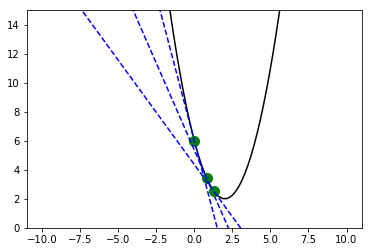

In [170]:
xx = np.linspace(-10, 10, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.2

# k = 1
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 3
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
plt.ylim(0, 15)
plt.show()

2차원 Rosenbrock 함수에 대해 SGD를 적용해보자. 우선 그레디언트 벡터는 다음과 같다. 마찬가지로 도함수는 손으로 계산하였다.

In [171]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

$x=-2, y-2$에서 시작하여 SGD로 최적점을 찾아나가는 과정은 다음과 같다.

x = (-2, -2), g = [-4806. -1200.]
x = (1.8448000000000002, -1.04), g = [ 3280.47997256  -888.657408  ]
x = (-0.77958397804544122, -0.32907407359999974), g = [-295.69275076 -187.36505049]


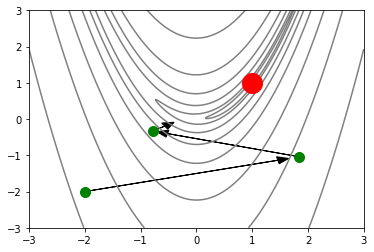

In [172]:
xx = np.linspace(-3, 3, 1000)
yy = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = -2
y = -2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.plot(x, y, 'go', markersize=10)
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.show()

만약 다른 위치에서 시작한다면 다음과 같을 수 있다. 아래 그림에서는 그래프의 영역을 최저점 주변으로 확대하였다.

x = (1.9, 2), g = [ 1225.4  -322. ]
x = (0.91967999999999994, 2.2576000000000001), g = [-519.51817176  282.35773952]
x = (1.3352945374108056, 2.0317138083840001), g = [-132.16574358   49.74046135]
x = (1.4410271322750705, 1.9919214393048221), g = [ 49.66817576 -16.92755133]


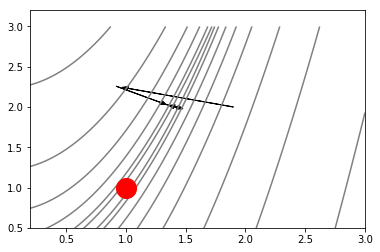

In [173]:
xx = np.linspace(-3, 3, 1000)
yy = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

# step size
mu = 8e-4
s = 0.9  # for arrowr head drawing

# k = 1
x = 1.9
y = 2
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 2
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 3
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# k = 4
x = x - mu * g[0]
y = y - mu * g[1]
g = f2g(x, y)
print("x = {}, g = {}".format((x,y), g))
plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlim(0.2, 3)
plt.ylim(0.5, 3.2)

plt.show()

위 경우에서 볼 수 있듯이 SGD 방법은 곡면의 모양이 계곡(valley)과 같이 생긴 경우, 즉 그레디언트 벡터가 최저점을 가리키고 있지 않는 경우에는 에는 수렴하는데 시간이 오래 걸릴 수 있다.

## 2차 도함수를 사용한 방법

최적화 속도를 향상시키기 위해 실제로 간단한 최적화 문제에서는 SGD 방법이 아닌 

* CG(conjugated gradient) 방법
* BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법

등을 사용한다.

이 방법은 모두 최적화하려는 영역을 2차 함수와 비슷한 모양으로 가정하고 1차 도함수인 그레디언트 뿐 아니라 2차 도함수인 헤시안 행렬 정보를 이용하여 더 빠르고 안정적으로 수렴하도록 한다. 

<img src="https://datascienceschool.net/upfiles/a5ba6251b6f144249cca6eb8cc523682.png" style="width:50%; margin: 0 auto 0 auto;" >

## SciPy를 이용한 최적화

SciPy의 optimize 서브 패키지는  최적화 명령 `minimize` 를 제공한다. 세부적인 알고리즘은 `method` 인수로 선택할 수 있다. 디폴트 알고리즘은 BFGS 방법이다.

`minimize` 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다.

In [174]:
result = minimize(f1, 0)
print(result)
x0 = result['x']
x0

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])


array([ 1.99999999])

In [142]:
result = minimize(f1, 0, jac=f1d)
print(result)
x0 = result['x']
x0

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.])


array([ 2.])

In [175]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [176]:
result = sp.optimize.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 5.2112890141803265e-12
 hess_inv: array([[ 0.49938636,  0.99860874],
       [ 0.99860874,  2.00187364]])
      jac: array([  7.32138760e-05,  -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([ 0.99999854,  0.9999969 ])


array([ 0.99999854,  0.9999969 ])

In [185]:
import sympy
sympy.init_printing(use_latex='mathjax')

In [186]:
x0j, x1j = sympy.symbols('x[0],x[1]')

In [187]:
x0j

x[0]

In [188]:
x1j

x[1]

In [189]:
f2j = (1 - x0j)**2 + 100.0 * (x1j - x0j**2)**2
f2j

                                     2
           2         ⎛      2       ⎞ 
(-x[0] + 1)  + 100.0⋅⎝- x[0]  + x[1]⎠ 

In [190]:
sympy.diff(f2j,x0j)

             ⎛      2       ⎞             
- 400.0⋅x[0]⋅⎝- x[0]  + x[1]⎠ + 2⋅x[0] - 2

In [191]:
sympy.diff(f2j,x1j)

            2             
- 200.0⋅x[0]  + 200.0⋅x[1]

In [192]:
jacobian=np.array([sympy.diff(f2j,x0j),sympy.diff(f2j,x1j)])
jacobian

array([-400.0*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2,
       -200.0*x[0]**2 + 200.0*x[1]], dtype=object)

In [193]:
def f2d(x):
    """derivative of f1(x)"""
    return np.array([-400.0*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2,
       -200.0*x[0]**2 + 200.0*x[1]])

In [194]:
result = sp.optimize.minimize(f2, (-2, -2))
print(result)
x0 = result['x']
x0

      fun: 5.2112890141803265e-12
 hess_inv: array([[ 0.49938636,  0.99860874],
       [ 0.99860874,  2.00187364]])
      jac: array([  7.32138760e-05,  -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([ 0.99999854,  0.9999969 ])


array([ 0.99999854,  0.9999969 ])

In [195]:
result = sp.optimize.minimize(f2, (-2, -2), jac=f2d)
print(result)
x0 = result['x']
x0

      fun: 1.1533876670446542e-16
 hess_inv: array([[ 0.49933677,  0.9987296 ],
       [ 0.9987296 ,  2.00252766]])
      jac: array([  4.30116939e-07,  -2.14563897e-07])
  message: 'Optimization terminated successfully.'
     nfev: 73
      nit: 56
     njev: 73
   status: 0
  success: True
        x: array([ 1.,  1.])


array([ 1.,  1.])

## 전역 최적화 문제

만약 최적화 하려는 함수가 복수의 국소 최저점(local minima)을 가지고 있는 경우에는 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없다. 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존한다.

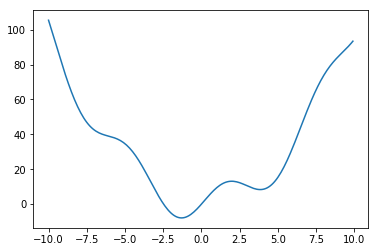

In [200]:
def f_global(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x));

In [203]:
result = sp.optimize.minimize(f_global, -5)
print(result)
x0 = result['x']
x0

      fun: -7.945823375615283
 hess_inv: array([[ 0.08581214]])
      jac: array([ -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-1.30644001])


array([-1.30644001])

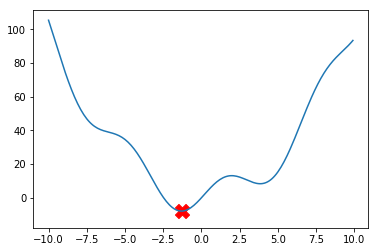

In [204]:
plt.plot(x, f_global(x));
plt.scatter(x0, f_global(x0), c='r', marker='X',s=200);

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 `fmin_slsqp` 명령을 제공한다.